In [180]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
matplotlib.rc('font',family = 'NanumGothicCoding')

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import export_graphviz
import graphviz

import statsmodels.formula.api as smf

#ignore warnings
import warnings
warnings.filterwarnings('ignore')




###
from pandas import set_option
from scipy import stats

In [147]:
df_raw = pd.read_csv("./data/BOSTON_HOUSING.csv", encoding = '949')
df_raw.head(10)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,6.32e-03,18.0,2.31,0,0.54,6.57,65.2,4.09,1,296,15.3,396.90,4.98
1,21.6,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14
2,34.7,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03
3,33.4,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94
4,36.2,6.90e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33
5,28.7,2.99e-02,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222,18.7,394.12,5.21
6,22.9,8.83e-02,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311,15.2,395.60,12.43
7,27.1,1.45e-01,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311,15.2,396.90,19.15
8,16.5,2.11e-01,12.5,7.87,0,0.52,5.63,100.0,6.08,5,311,15.2,386.63,29.93
9,18.9,1.70e-01,12.5,7.87,0,0.52,6.00,85.9,6.59,5,311,15.2,386.71,17.10


In [148]:
print(df_raw.shape)

(506, 14)


In [149]:
df_raw.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [150]:
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [151]:
prices = df_raw['MEDV']

minimum_price = np.mean(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $22.53
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


In [152]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,22.53,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,9.20,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,5.00,6.32e-03,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,17.03,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,21.20,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,25.00,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.95
max,50.00,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [153]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = df_raw.corr(), annot = True,
#            fmt = '.3f', linewidths = .8, cmap = 'Blues', square=True)

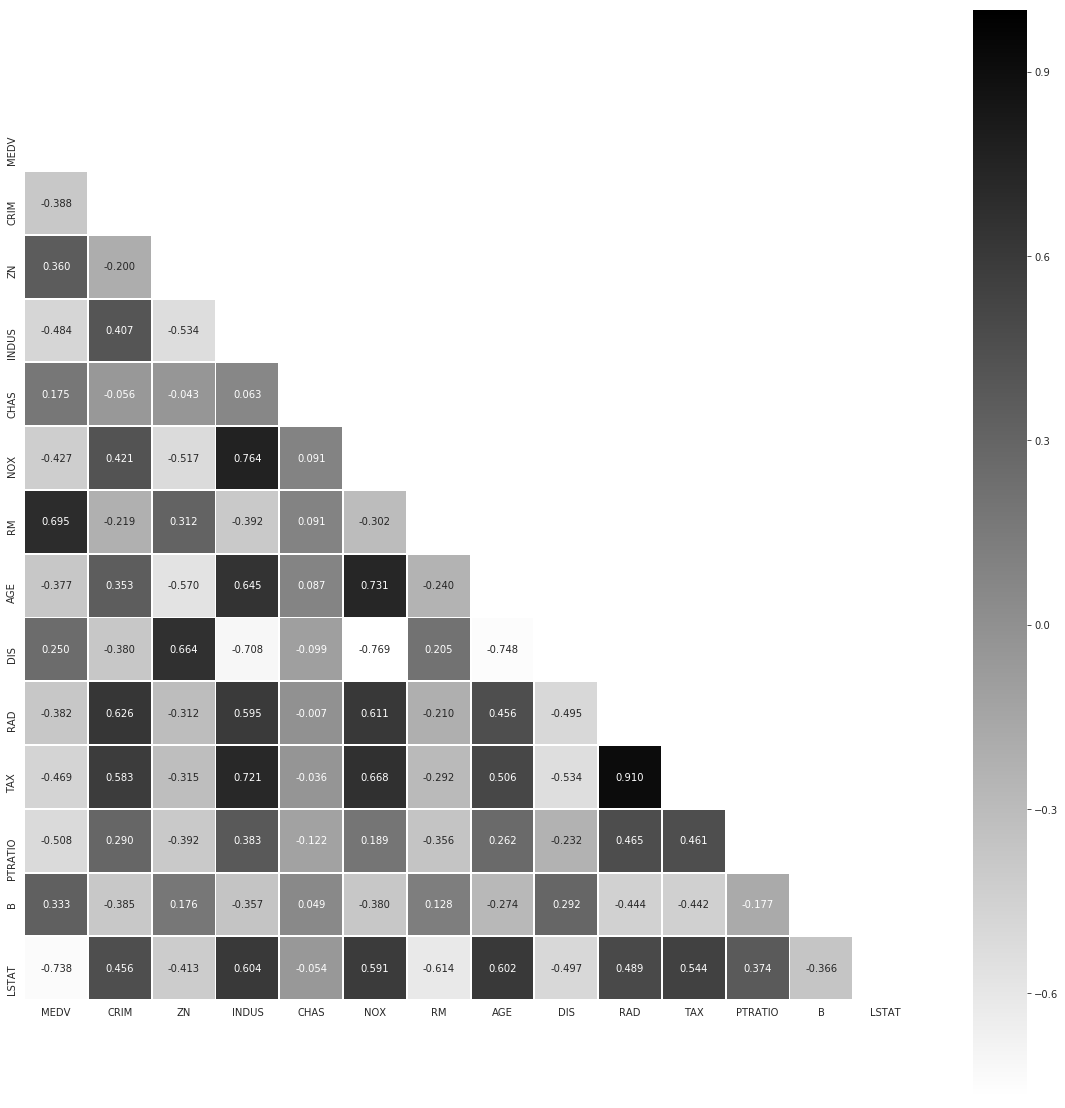

In [154]:
plt.figure(figsize=(20,20))
mask = np.zeros_like(df_raw.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df_raw.corr(),fmt = '.3f', square = True, annot=True, linewidths=.9, cmap='gray_r', mask=mask)

> - `RM, LSTAT, PTRATIO`, 은 0.5 이상이고
> - TAX, NOX, INDUS 는 0.4 이상
> - RAD, AGE, CRIME, ZN은 0.3 후반

- RM 은 이웃들간의 평균 적인 방의 수를 말함
- LSTAT 은 주변 이웃들 대비 저소득층을 말함
- PTRATIO 는 학생 교사 비율

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d9a785e48>,
      dtype=object)

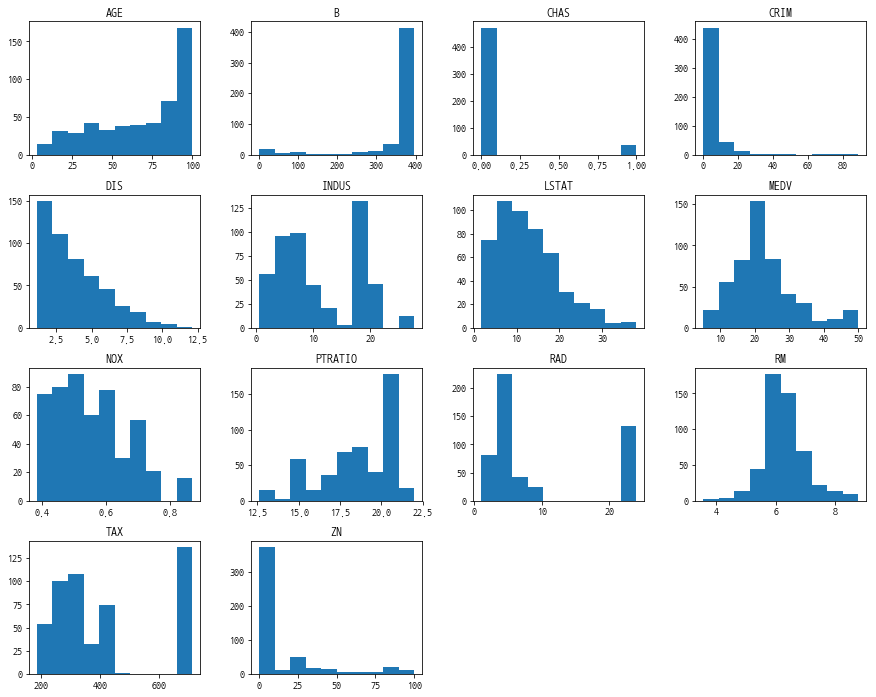

In [155]:
df_raw.hist(bins = 10, figsize = (15,12), grid = False)


> 1. PTRATIO 학생 교사 인구 값이 증가할 수록 MEDV 집값은 감소함 (반비례 상관관계)
> 2. RM 값이 증가하면 MEDV값도 증가하는 것을 확인 (선형 상관관계)
> 3. LSTAT 값이 가장 높을 때 MEDV 값이 가장 작음 (반비례 상관관계)

In [156]:
reg_model = smf.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 04 May 2019   Prob (F-statistic):          6.72e-135
Time:                        22:50:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

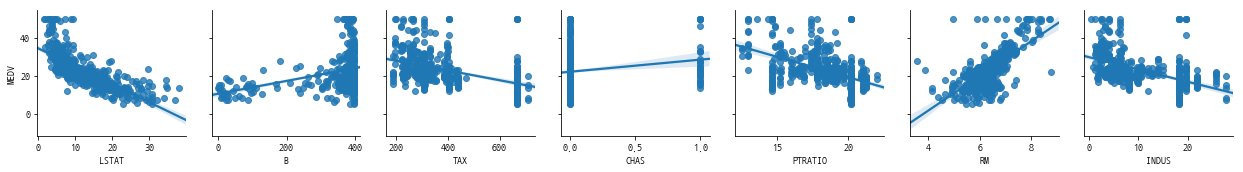

In [157]:
sns.pairplot(df_raw, y_vars='MEDV', x_vars=['LSTAT', 'B', 'TAX', 'CHAS', 'PTRATIO', 'RM', 'INDUS'], kind='reg')

> 집값은 RM(방의 수)이 증가하면 함께 증가하고
PTRATO, LASAT 저소득층 비율과 학생교사 비율이 증가하면 집값은 반대로 감소한다

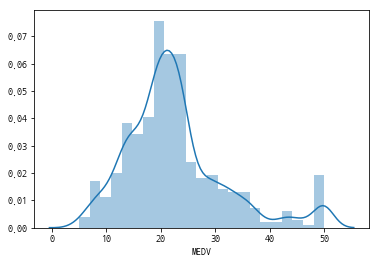

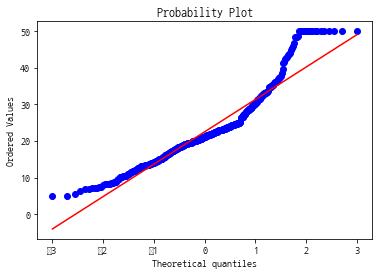

In [158]:
sns.distplot(df_raw['MEDV'], hist=True);
fig = plt.figure()
res = stats.probplot(df_raw['MEDV'], plot=plt)

In [159]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop(['MEDV', 'CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD'], axis = 1, inplace = False)
df_raw_x.head()

,INDUS,CHAS,RM,TAX,PTRATIO,B,LSTAT
0,2.31,0,6.57,296,15.3,396.90,4.98
1,7.07,0,6.42,242,17.8,396.90,9.14
2,7.07,0,7.18,242,17.8,392.83,4.03
3,2.18,0,7.00,222,18.7,394.63,2.94
4,2.18,0,7.15,222,18.7,396.90,5.33


In [160]:
df_raw_y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## data 분할

In [161]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (354, 7)
train data Y size : (354,)
test data X size : (152, 7)
test data Y size : (152,)


In [162]:
# df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
#                                                                , test_size = 0.4, random_state = 1234)
# print('train data X size : {}'.format(df_train_x.shape))
# print('train data Y size : {}'.format(df_train_y.shape))
# print('validation X size : {}'.format(df_validation_x.shape))
# print('validation Y size : {}'.format(df_validation_y.shape))

## 각각의 모델 평가

In [163]:
df_raw_x.head()

,INDUS,CHAS,RM,TAX,PTRATIO,B,LSTAT
0,2.31,0,6.57,296,15.3,396.90,4.98
1,7.07,0,6.42,242,17.8,396.90,9.14
2,7.07,0,7.18,242,17.8,392.83,4.03
3,2.18,0,7.00,222,18.7,394.63,2.94
4,2.18,0,7.15,222,18.7,396.90,5.33


In [174]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

In [165]:
LR = LinearRegression()
LR.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(LR.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(LR.score(df_test_x, df_test_y)))

Score on trainning set : 0.669
Score on test set : 0.737


In [166]:
DTR = DecisionTreeRegressor(random_state = 1234)
DTR.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(DTR.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(DTR.score(df_test_x, df_test_y)))

Score on trainning set : 1.000
Score on test set : 0.755


In [167]:
RFR = RandomForestRegressor(random_state = 1234)
RFR.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(RFR.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(RFR.score(df_test_x, df_test_y)))

Score on trainning set : 0.963
Score on test set : 0.843


In [168]:
result = []
GBR = GradientBoostingRegressor(random_state = 1234)
GBR.fit(df_train_x, df_train_y)
# cv_result = cross_val_score(GBR, df_train_x, df_train_y, cv = None)
# result.append(cv_result)

print('Score on trainning set : {:.3f}'.format(GBR.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(GBR.score(df_test_x, df_test_y)))
# print('sample : {:.3f}'.format(cv_result.mean()))

Score on trainning set : 0.955
Score on test set : 0.880


In [175]:
RMS = 'neg_mean_squared_error'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model, df_train_x, df_train_y, cv = kfold, scoring = RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -29.102517 (17.385238)
DTR: -32.348217 (18.304979)
RF: -18.364293 (11.666298)
GB: -17.301145 (9.792714)
KNN: -39.507714 (16.462302)


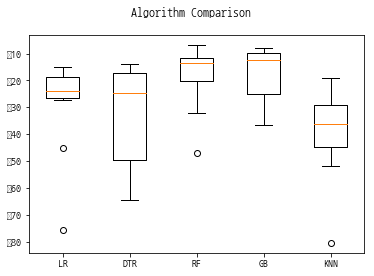

In [176]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# models.append(('LR', LinearRegression()))
# models.append(('DTR', DecisionTreeRegressor()))
# models.append(('RF', RandomForestRegressor()))
# models.append(('GB', GradientBoostingRegressor()))
# models.append(('KNN', KNeighborsRegressor()))

In [182]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, df_train_x, df_train_y, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -29.102517 (17.385238)
ScaledDTR: -33.362033 (17.045569)
ScaledRF: -18.296775 (10.626119)
ScaledGB: -17.324339 (10.009342)
ScaledKNN: -22.196492 (10.731309)


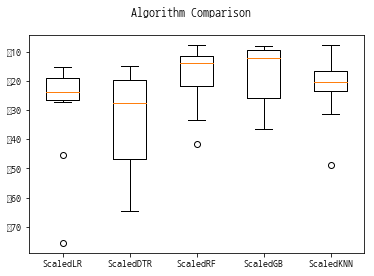

In [183]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [184]:
train_score = [];test_score=[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                ,min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [186]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.00,0.76
1,2,0.97,0.78
2,3,0.93,0.82
3,4,0.91,0.82
4,5,0.90,0.84
5,6,0.88,0.85
6,7,0.86,0.81
7,8,0.86,0.82
8,9,0.85,0.81
9,10,0.83,0.82


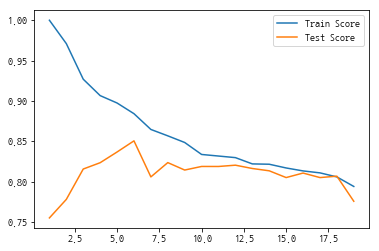

In [187]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.legend()

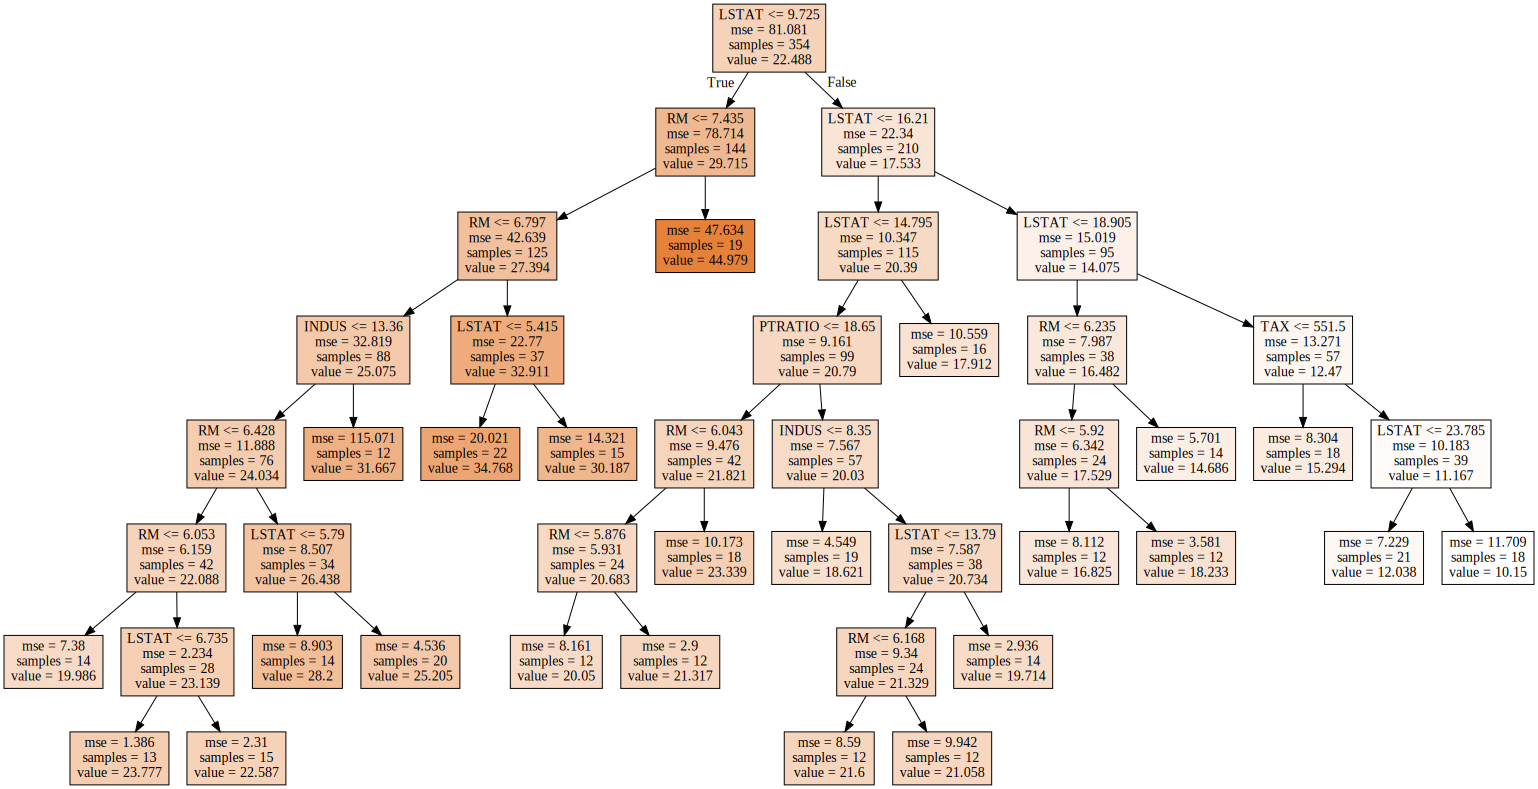

In [197]:
v_feature_names = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)

with open('tree_leaf_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## splite

In [192]:
train_score = [];test_score=[]
para_split = [n_split * 2 for n_split in range(1,30)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 11
                                ,min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplite'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplite,TrainScore,TestScore
0,2,0.83,0.82
1,4,0.83,0.82
2,6,0.83,0.82
3,8,0.83,0.82
4,10,0.83,0.82
5,12,0.83,0.82
6,14,0.83,0.82
7,16,0.83,0.82
8,18,0.83,0.82
9,20,0.83,0.82


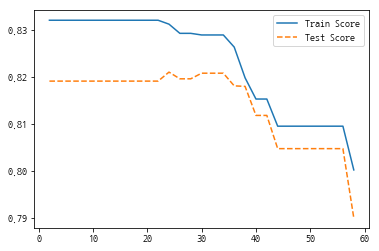

In [193]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

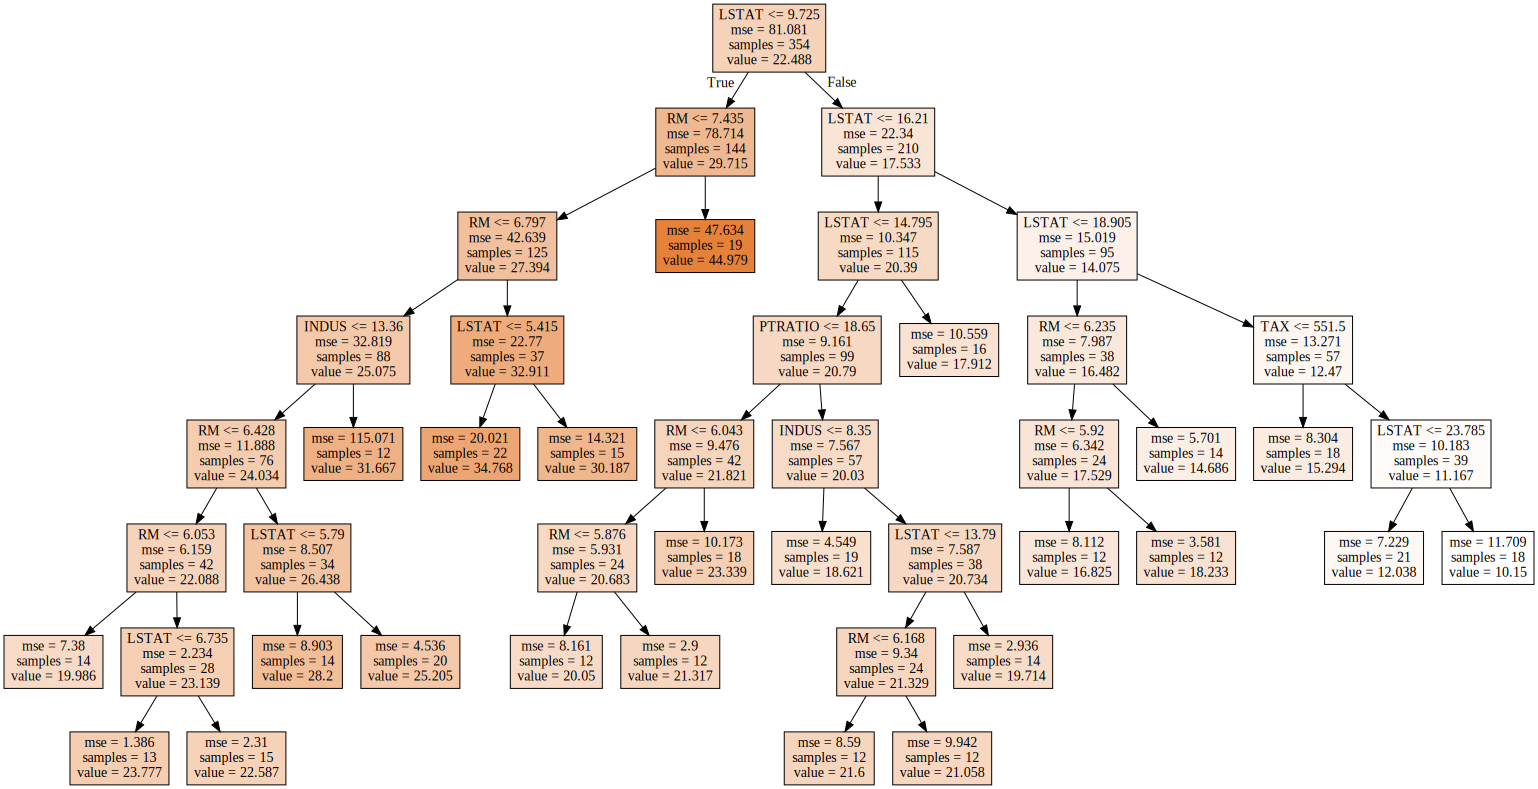

In [198]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=12, min_samples_split = 22)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [200]:
train_score = [];test_score=[]
para_depth = [depth for depth in range(1,20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12
                                ,min_samples_split = 22, max_depth = v_max_depth)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamples_Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,MinSamples_Depth,TrainScore,TestScore
0,1,0.44,0.44
1,2,0.69,0.71
2,3,0.76,0.77
3,4,0.80,0.80
4,5,0.82,0.81
5,6,0.83,0.82
6,7,0.83,0.82
7,8,0.83,0.82
8,9,0.83,0.82
9,10,0.83,0.82


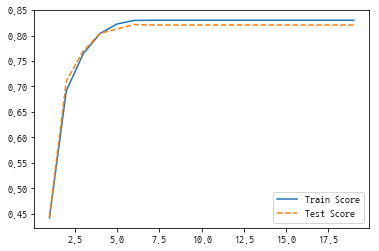

In [201]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

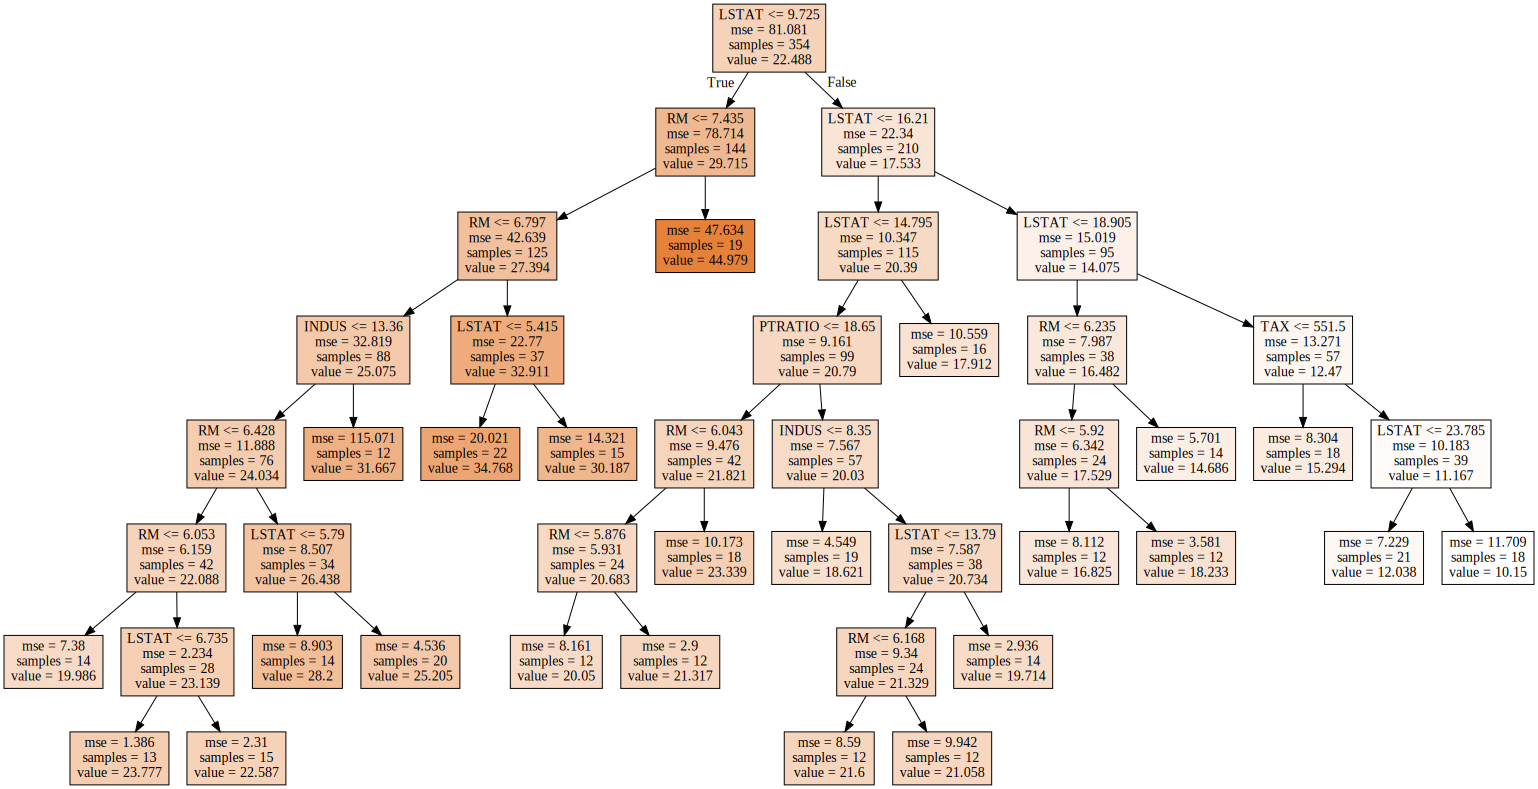

In [202]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 22, max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = 'tree_depth_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [204]:
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 22, max_depth = 6)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=22, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [205]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,LSTAT,6.53e-01
2,RM,3.07e-01
0,INDUS,2.80e-02
3,TAX,9.00e-03
4,PTRATIO,3.00e-03
1,CHAS,0.00e+00
5,B,0.00e+00


Text(0, 0.5, '변수')

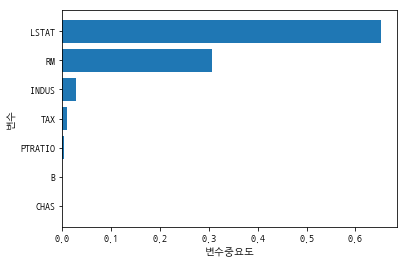

In [206]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

In [207]:
x_pred = tree_final.predict(df_test_x)
print('mse : {:.3f}'.format(mean_absolute_error(df_test_y, x_pred)))
print('mae : {:.3f}'.format(mean_squared_error(df_test_y, x_pred)))

mse : 2.919
mae : 16.441


In [208]:

print('Score on trainning set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on trainning set : 0.830
Score on test set : 0.822


In [209]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 22, max_depth = 6)))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

In [210]:
RMS = 'neg_mean_squared_error'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model, df_train_x, df_train_y, cv = kfold, scoring = RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -29.102517 (17.385238)
DTR: -22.668356 (18.018251)
RF: -18.763920 (13.831548)
GB: -17.266391 (9.894619)
KNN: -39.507714 (16.462302)


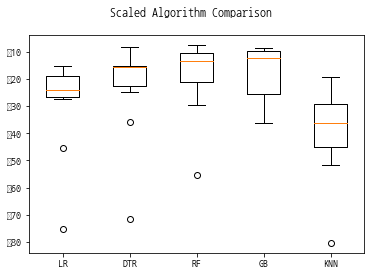

In [211]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [225]:
ensembles = []
ensembles.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
ensembles.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 22, max_depth = 6))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor())])))
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, df_train_x, df_train_y, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -29.102517 (17.385238)
ScaledDTR: -22.668356 (18.018251)
ScaledRF: -19.284407 (12.121793)
ScaledGB: -17.262323 (9.612577)
ScaledKNN: -22.196492 (10.731309)


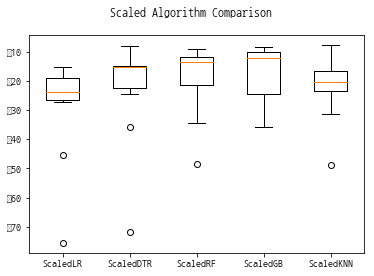

In [226]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [229]:
scaler = StandardScaler().fit(df_train_x)
rescaledX = scaler.transform(df_train_x)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, df_train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -16.593626 using {'n_estimators': 50}
-16.593626 (9.944076) with: {'n_estimators': 50}
-17.176101 (9.805515) with: {'n_estimators': 100}
-17.257640 (9.946841) with: {'n_estimators': 150}
-17.438700 (9.836996) with: {'n_estimators': 200}
-17.610916 (9.884736) with: {'n_estimators': 250}
-17.716700 (9.933767) with: {'n_estimators': 300}
-17.783542 (9.965729) with: {'n_estimators': 350}
-17.877064 (9.958186) with: {'n_estimators': 400}


In [232]:
# prepare the model
scaler = StandardScaler().fit(df_train_x)
rescaledX = scaler.transform(df_train_x)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, df_train_y)

# transform the validation dataset
rescaledValidationX = scaler.transform(df_test_x)
predictions = model.predict(rescaledValidationX)
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, predictions)))
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, predictions)))

mse : 11.455
mae : 2.438


In [235]:
# prepare the model
scaler = StandardScaler().fit(df_train_x)
rescaledX = scaler.transform(df_train_x)
model = GradientBoostingRegressor(random_state=seed, n_estimators=50)
model.fit(rescaledX, df_train_y)

# transform the validation dataset
rescaledValidationX = scaler.transform(df_test_x)
predictions = model.predict(rescaledValidationX)
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, predictions)))
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, predictions)))

mse : 11.265
mae : 2.350


In [237]:
print('R^2:',metrics.r2_score(df_test_y, predictions))
print('Adjusted R^2:',1 - (1-metrics.r2_score(df_test_y, predictions))*(len(df_train_y)-1)/(len(df_train_y)-df_train_x.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(df_test_y, predictions))
print('MSE:',metrics.mean_squared_error(df_test_y, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(df_test_y, predictions)))

R^2: 0.8777951421726836
Adjusted R^2: 0.8753227895576801
MAE: 2.350090543512519
MSE: 11.26483890318288
RMSE: 3.3563132903802173


In [170]:
# lr = LinearRegression()
# lr.fit(df_train_x, df_train_y)

# print('Score on trainning set : {:.3f}'.format(lr.score(df_train_x, df_train_y)))
# print('Score on test set : {:.3f}'.format(lr.score(df_test_x, df_train_y)))

In [171]:
# y_pred = lr.predict(df_train_x)

In [172]:
# print('R^2:',metrics.r2_score(df_train_y, y_pred))
# print('Adjusted R^2:',1 - (1-metrics.r2_score(df_train_y, y_pred))*(len(df_train_y)-1)/(len(df_train_y)-df_train_x.shape[1]-1))
# print('MAE:',metrics.mean_absolute_error(df_train_y, y_pred))
# print('MSE:',metrics.mean_squared_error(df_train_y, y_pred))
# print('RMSE:',np.sqrt(metrics.mean_squared_error(df_train_y, y_pred)))